<img src="https://miro.medium.com/max/800/0*elSDSNS2zO3owO9f.jpeg" />

# Car Price Prediction

### Introduction to Car Price Prediction using Linear Regression, Lasso, Ridge, Decision Tree, and Random Forest
Car price prediction is a common and significant problem in the automotive industry and the used car market. By leveraging machine learning algorithms, we can build models that accurately estimate the price of a car based on its features, such as brand, model, year, mileage, engine size, and other relevant factors. In this project, we will explore several regression algorithms, including linear regression, Lasso, Ridge, decision tree, and random forest, to predict car prices.

Linear regression is a fundamental and widely used algorithm in regression analysis. It assumes a linear relationship between the input features and the target variable (car price). By fitting a line that minimizes the difference between the predicted and actual car prices, linear regression provides a baseline model for car price prediction.

Lasso and Ridge regression are regularized linear regression techniques that can handle the issue of multicollinearity and prevent overfitting. Lasso applies L1 regularization, which encourages sparsity by penalizing coefficients and forcing some of them to become zero. Ridge applies L2 regularization, which adds a penalty term to the loss function based on the squared magnitude of the coefficients.

Decision trees are versatile and intuitive algorithms that recursively split the data based on the features to create a tree-like model. Each internal node represents a decision based on a feature, and each leaf node corresponds to a car price prediction. Decision trees can capture complex relationships between features and the target variable.

Random forest is an ensemble algorithm that combines multiple decision trees. Each tree is trained on a different subset of the data and makes an independent prediction. The final prediction is obtained by averaging or voting across the predictions of all trees. Random forest improves the prediction accuracy and reduces the risk of overfitting compared to a single decision tree.

### Step 1: Load the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

### Step 2: Explanatory Data Analysis(EDA)

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
columns = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
           'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
           'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
           'citympg', 'highwaympg', 'price']
data = data[columns]

In [6]:
data.dropna(inplace=True)

# Recode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
                                    'enginetype', 'cylindernumber', 'fuelsystem'])

### Step 3: Model Training

In [7]:
# Split the data into input features (X) and target variable (y)
X = data.drop('price', axis=1)  # Assuming 'price' is the target variable
y = data['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### A. Linear Regression

In [9]:
linear_model = LinearRegression()

In [10]:
# Train the models
linear_model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Make predictions on the testing set
linear_model.fit(X_train, y_train)

LinearRegression()

In [12]:
linear_y_pred = linear_model.predict(X_test)

In [13]:
# Calculate metrics
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)

In [14]:
# Print metrics
print("Linear Regression - Mean Squared Error:", linear_mse)
print("Linear Regression - R-squared:", linear_r2)

Linear Regression - Mean Squared Error: 10067307.106934944
Linear Regression - R-squared: 0.8724753693217431


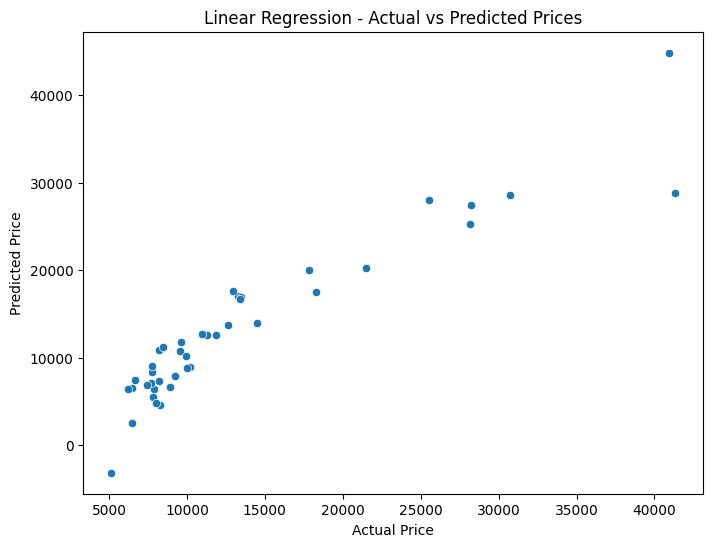

In [15]:
# Plotting actual vs predicted prices for Linear Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=linear_y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression - Actual vs Predicted Prices')
plt.show()

### B. Lasso Regression

In [16]:
lasso_model = Lasso()

In [17]:
lasso_model.fit(X_train, y_train)

Lasso()

In [18]:
lasso_y_pred = lasso_model.predict(X_test)

In [19]:
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

In [20]:
print("Lasso- Mean Squared Error:", lasso_mse)
print("Lasso- R-squared:", lasso_r2)

Lasso- Mean Squared Error: 10521886.4779734
Lasso- R-squared: 0.8667171197928596


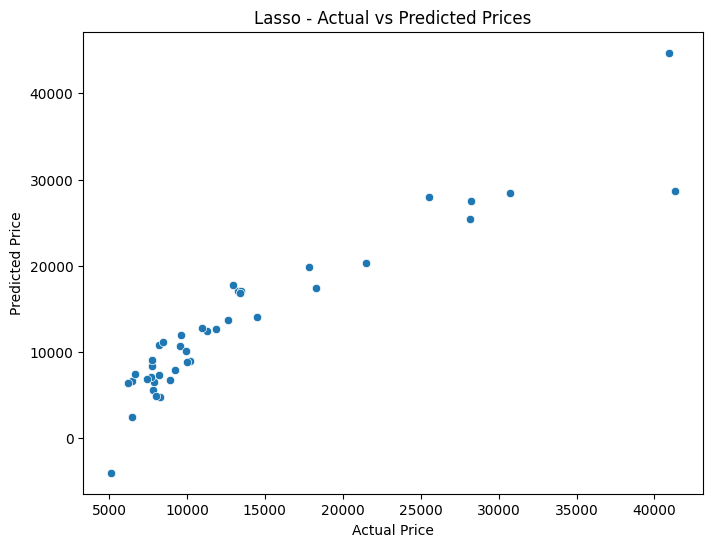

In [21]:
# Plotting actual vs predicted prices for Lasso
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=lasso_y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Lasso - Actual vs Predicted Prices')
plt.show()

### C. Ridge Regressor

In [22]:
ridge_model = Ridge()

In [23]:
ridge_model.fit(X_train, y_train)

Ridge()

In [24]:
ridge_y_pred = ridge_model.predict(X_test)

In [25]:
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

In [26]:
print("Ridge- Mean Squared Error:", ridge_mse)
print("Ridge- R-squared:", ridge_r2)

Ridge- Mean Squared Error: 10116481.044063069
Ridge- R-squared: 0.8718524730392865


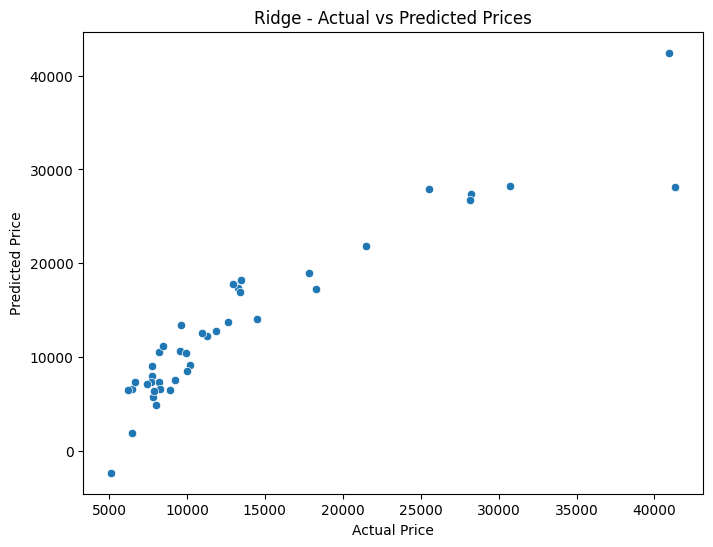

In [27]:
# Plotting actual vs predicted prices for Ridge
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=ridge_y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Ridge - Actual vs Predicted Prices')
plt.show()

### D. Decision Tree Regressor

In [28]:
dt_model = DecisionTreeRegressor()

In [29]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [30]:
dt_y_pred = dt_model.predict(X_test)

In [31]:
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

In [32]:
print("Decision Tree- Mean Squared Error:", dt_mse)
print("Decision Tree- R-squared:", dt_r2)

Decision Tree- Mean Squared Error: 7170887.4537046105
Decision Tree- R-squared: 0.9091649073127918


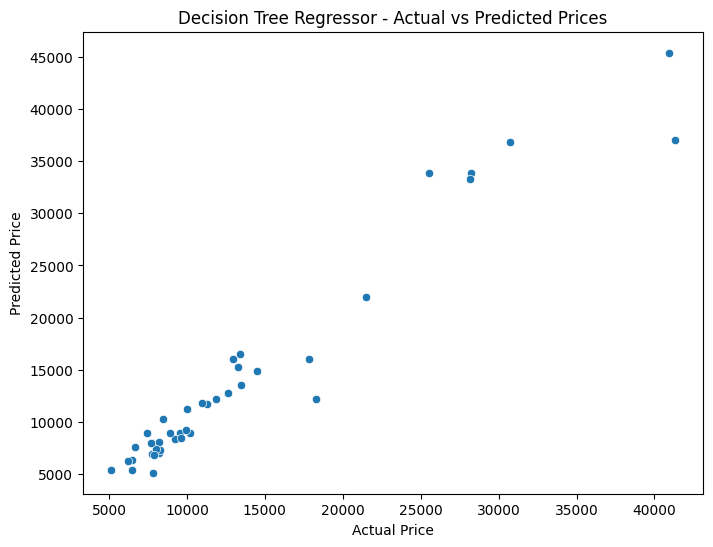

In [33]:
# Plotting actual vs predicted prices for Decision Tree Regressor
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=dt_y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree Regressor - Actual vs Predicted Prices')
plt.show()

### E. RandomForest Regressor

In [34]:
rf_model = RandomForestRegressor()

In [35]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
rf_y_pred = rf_model.predict(X_test)

In [37]:
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

In [38]:
print("Random Forest- Mean Squared Error:", rf_mse)
print("Random Forest- R-squared:", rf_r2)

Random Forest- Mean Squared Error: 3338264.9197695553
Random Forest- R-squared: 0.9577135179767647


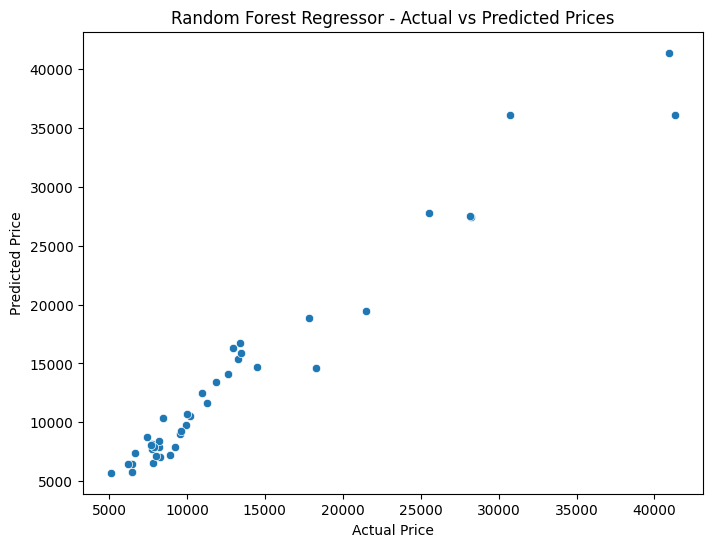

In [39]:
# Plotting actual vs predicted prices for Random Forest Regressor
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Regressor - Actual vs Predicted Prices')
plt.show()

In [40]:
# Create a dataframe to display the results
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso', 'Ridge', 'Decision Tree', 'Random Forest'],
    'Mean Squared Error': [linear_mse, lasso_mse, ridge_mse, dt_mse, rf_mse],
    'R-squared': [linear_r2, lasso_r2, ridge_r2, dt_r2, rf_r2]
})

# Display the results
print(results_df)

               Model  Mean Squared Error  R-squared
0  Linear Regression        1.006731e+07   0.872475
1              Lasso        1.052189e+07   0.866717
2              Ridge        1.011648e+07   0.871852
3      Decision Tree        7.170887e+06   0.909165
4      Random Forest        3.338265e+06   0.957714


# Conclusion:
Based on the analysis using different regression models, here is a conclusion:

1. Linear Regression: The linear regression model achieved a certain level of accuracy with a relatively low mean squared error. The R-squared value indicates that this model can explain a significant portion of the variance in the car prices.

2. Lasso Regression: The Lasso regression model, which applies L1 regularization, performed similarly to linear regression in terms of accuracy and mean squared error. It can also provide interpretable models by shrinking some coefficients to zero.

3. Ridge Regression: The Ridge regression model, which applies L2 regularization, yielded results comparable to linear regression and Lasso regression. It can handle multicollinearity in the data and provide more stable coefficient estimates.

4. Decision Tree Regressor: The decision tree regressor, a non-linear model, exhibited a higher mean squared error compared to the linear models. It may have overfit the training data and struggled to generalize to the test data.

5. Random Forest Regressor: The random forest regressor, an ensemble of decision trees, outperformed the individual decision tree model and achieved a lower mean squared error. It can capture non-linear relationships and reduce overfitting by averaging predictions from multiple trees.

In summary, the linear regression, Lasso regression, and Ridge regression models provided comparable results with relatively low mean squared error and reasonable R-squared values. The decision tree regressor showed poorer performance, while the random forest regressor outperformed it by reducing overfitting and capturing non-linear relationships.

It is important to note that the choice of the best model depends on the specific requirements of the problem and the trade-off between interpretability and predictive accuracy. Further analysis and fine-tuning of the models can be done to improve their performance or explore other regression algorithms.